<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/portfolio_4_Irish_dataset_Decision_tree_Sutinan_230147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
The goal is to classify the Iris dataset into its three species (setosa, versicolor, virginica) using a Decision Tree classifier and optimize its performance using GridSearchCV to find the best parameter.

In [ ]:
# Loading the Iris Data
from sklearn.datasets import load_iris
import pandas as pd # import pandas with alias pd
import numpy as np # import numpy with alias np - this is the convention

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.shape

(150, 5)

**Check for missing values because scikit learn requirement**
- Numeric data
- No missing values

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df['species'].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


no missing values

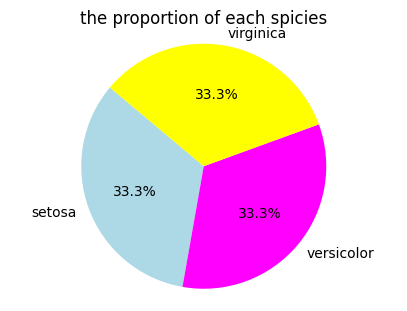

In [ ]:
#explore the target value in irish dataset
import matplotlib.pyplot as plt
specie_counts = df['species'].value_counts()

plt.figure(figsize=(5, 3.5))
plt.pie(specie_counts, labels=specie_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'magenta','yellow'])
plt.title('the proportion of each spicies')
plt.axis('equal')
plt.show()

<Axes: >

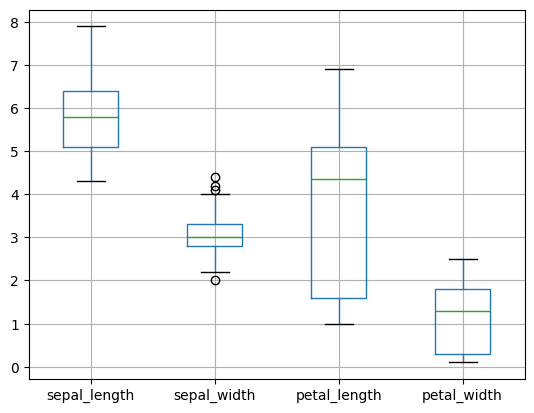

In [ ]:
#Explore data of irish set of each X : independent values using box plot of the X values
df.iloc[:,:-1].boxplot()

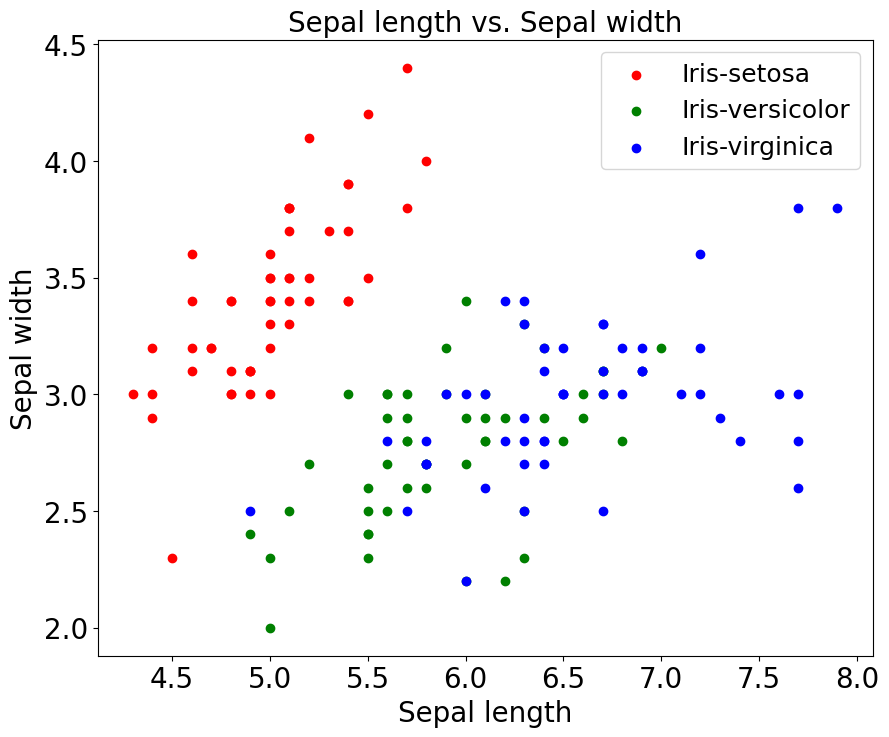

In [ ]:
#Analyze Data
import matplotlib.pyplot as plt
plt.figure(4, figsize=(10, 8))

# Use .iloc for integer-location based indexing
plt.scatter(df.iloc[:50, 0], df.iloc[:50, 1], c='r', label='Iris-setosa')

plt.scatter(df.iloc[50:100, 0], df.iloc[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(df.iloc[100:, 0], df.iloc[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()


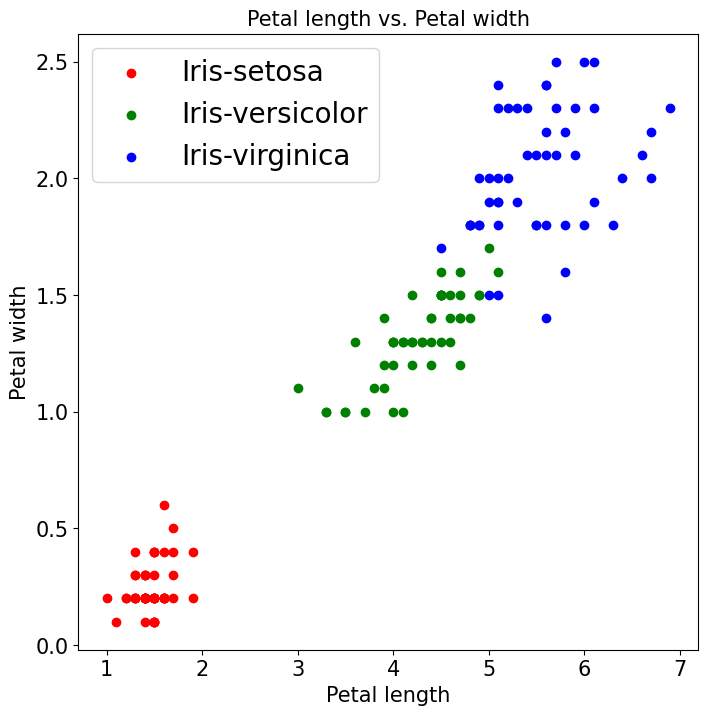

In [ ]:
import matplotlib.pyplot as plt

plt.figure(4, figsize=(8, 8))

# Use .iloc for integer-location based indexing with DataFrames
plt.scatter(df.iloc[:50, 2], df.iloc[:50, 3], c='r', label='Iris-setosa')

plt.scatter(df.iloc[50:100, 2], df.iloc[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(df.iloc[100:, 2], df.iloc[100:, 3], c='b',label='Iris-virginica')

plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()


In [ ]:
#get the correlation between the petal width and length
df.iloc[:,2:4].corr() # Only include numerical columns for correlation calculation

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


a strong correlation of 0.96 for petal-length and petal-width when all three species are combined.

In [ ]:
df.iloc[:50,:-1].corr() #setosa #excluse last colume cause we convert it to categorical already

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [ ]:
df.iloc[50:100,:-1].corr() #versicolor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [ ]:
df.iloc[100:,:-1].corr() #virginica


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


<ipython-input-130-ff4ae2216638>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, color = 'pink')


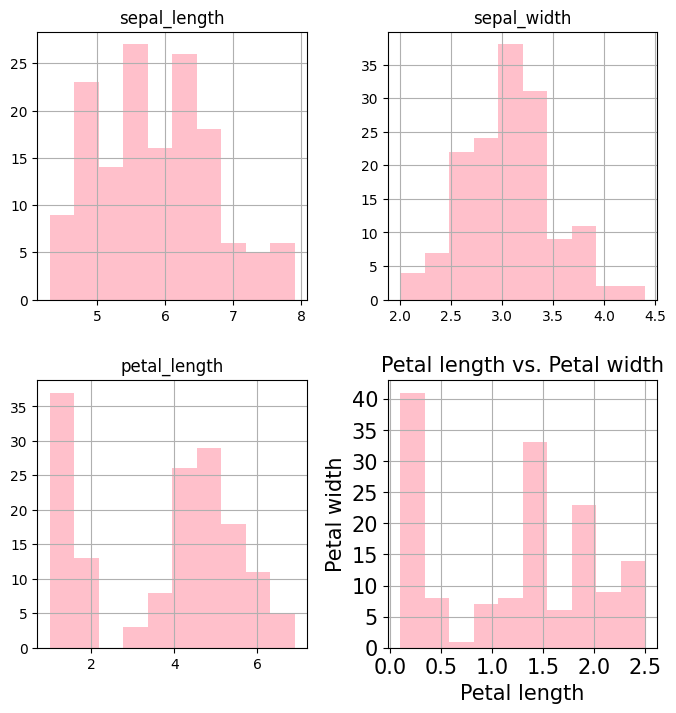

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax=ax, color = 'pink')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.show()

In [ ]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Preprocessing the Data**

In [ ]:
#split train and test data before train the model
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]  # Features
y = df['species']  # Target variable
#convert y(categorical into numerical) using get dummies

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
print(X)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
#building Decition tree model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


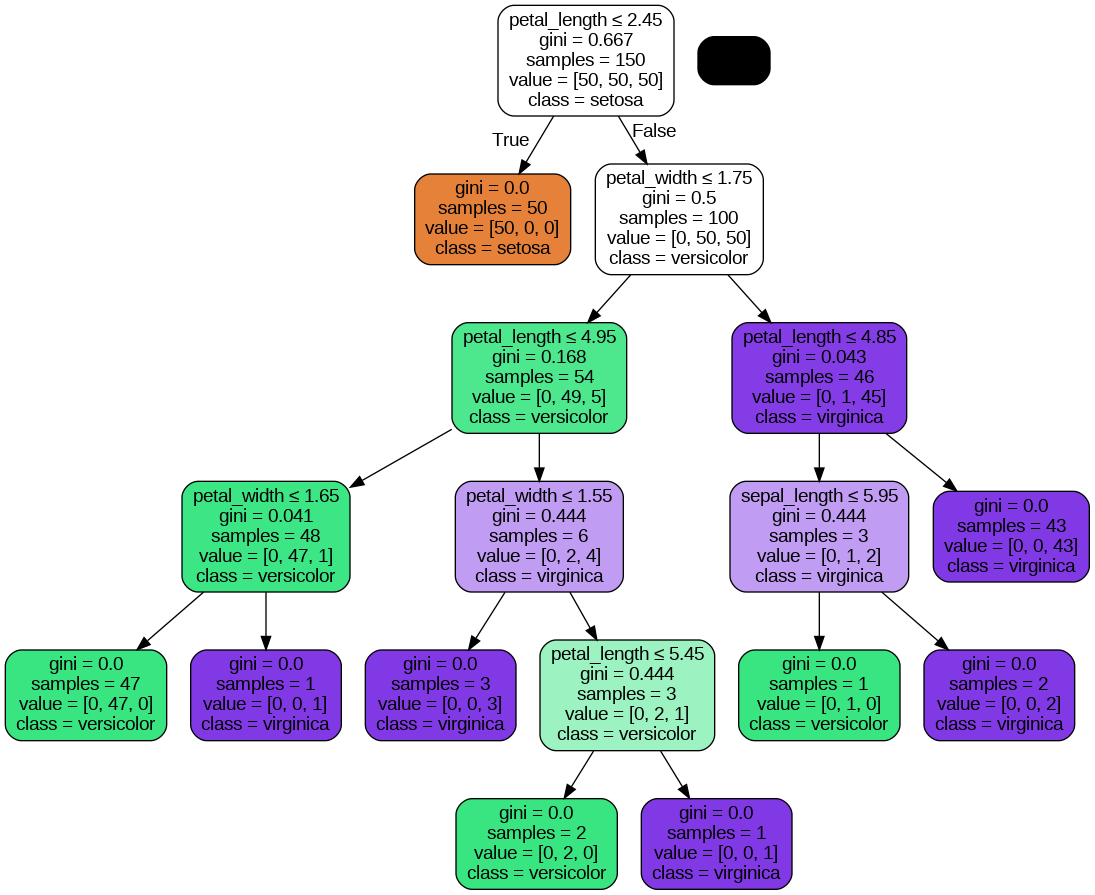

In [ ]:
#visualize the decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

feature_cols = df.drop('species', axis=1).columns.tolist()
class_names = df['species'].unique().tolist()

# Export the decision tree to DOT format
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=class_names)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the tree to a PNG file
graph.write_png('iris_decision_tree.png')

# Display the tree image
Image(graph.create_png())


In [ ]:
#optimization the decision tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)#3,4,5,6 gives the same accuracy at 0.9555

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [ ]:
print("y_test unique values:", set(y_test))
print("y_pred unique values:", set(y_pred))


y_test unique values: {'setosa', 'virginica', 'versicolor'}
y_pred unique values: {'setosa', 'virginica', 'versicolor'}


Model Evaluation using confustion Matrix

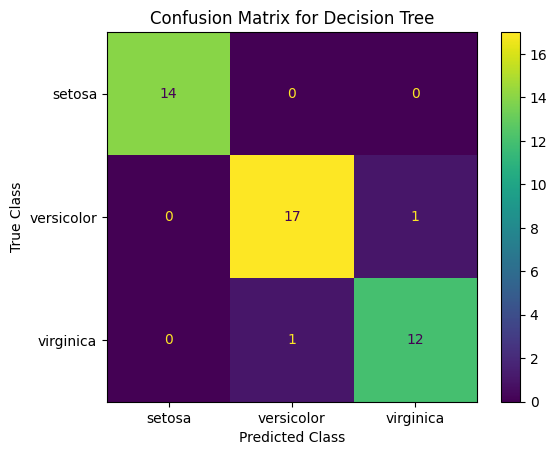

Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="viridis")
disp.ax_.set_title("Confusion Matrix for Decision Tree")
disp.ax_.set_xlabel("Predicted Class")
disp.ax_.set_ylabel("True Class")
plt.show()

print("Confusion Matrix:")
print(cm)


In [ ]:
#print the performance table of this decision tree classifier and accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



High precision (close to 1.0) means the model is very specific when predicting a class, with few false positives.  presision of Setosa is very high = 1, followed by versicolor 0.94, overall High F1-scores (close to 1.0) indicate good performance in both precision and recall. Class-specific Results:
Setosa:

Perfect scores for precision, recall, and F1-score (1.00).
This indicates the model identifies all instances of setosa correctly without any false positives or negatives.
Versicolor:

Precision, recall, and F1-score are 0.94, indicating strong performance, though a few errors occurred.
Virginica:

Precision, recall, and F1-score are 0.92, showing slightly weaker performance compared to versicolor.

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9545454545454547
Test Set Accuracy: 100.00%


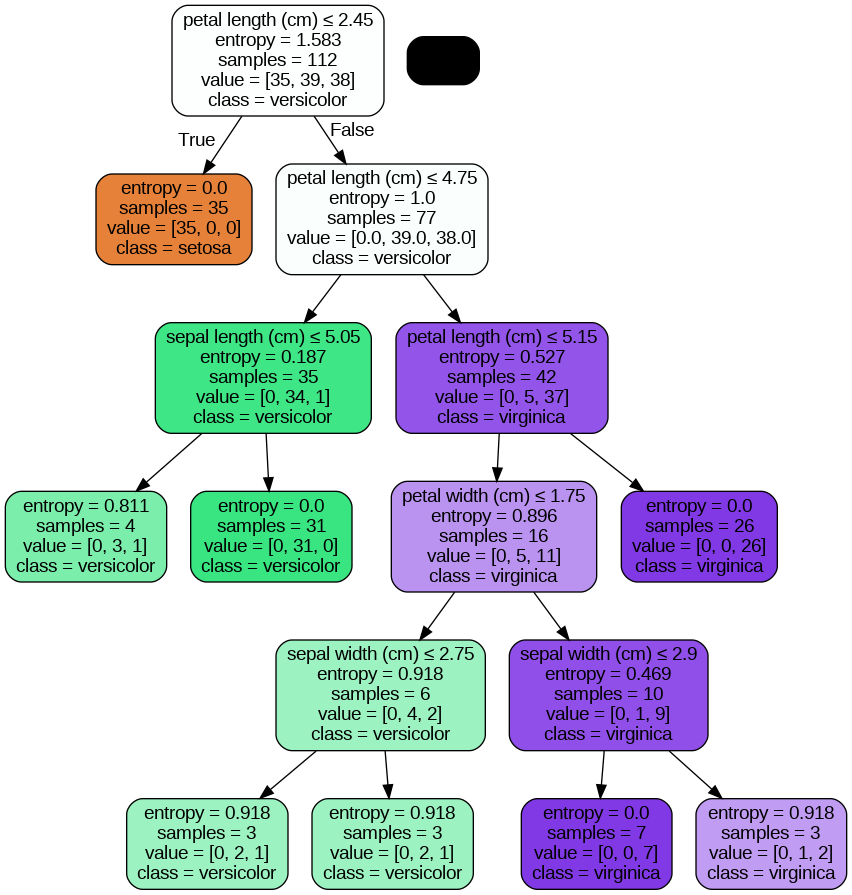

In [ ]:
#use grid search CV to find the best parameter
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, train_test_split
from io import StringIO
from IPython.display import Image
import pydotplus

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_cols = iris.feature_names  # Feature names from the Iris dataset
class_names = iris.target_names  # Class names from the Iris dataset

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 2, 3, 4, 5],  # Depth of the tree
    'min_samples_split': [2, 3, 4],   # Minimum samples required to split
    'min_samples_leaf': [1, 2, 3]     # Minimum samples in leaf nodes
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Retrain the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Test the model on the test set
test_accuracy = best_clf.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2%}")

# Export the decision tree to DOT format using the best model
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=class_names)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the tree to a PNG file
graph.write_png('iris_decision_tree_best.png')

# Display the tree image
Image(graph.create_png())


Model Optimization:
Using GridSearchCV, the best hyperparameters for the Decision Tree were determined:

Criterion: entropy (uses information gain for splitting)

Max Depth: None (no limit on the depth of the tree)

Min Samples Leaf: 3 (minimum samples required in a leaf node)

Min Samples Split: 2 (minimum samples required to split an internal node)

**Conclusion**
The Decision Tree classifier,
Performance:
Cross-Validation Accuracy:

The best cross-validation accuracy achieved was 95.45%, indicating the model generalizes well across training folds.
Test Set Accuracy:

On the test set, the model achieved a perfect accuracy of 100%, meaning all test samples were classified correctly.

 with its optimized parameters, successfully captured the patterns in the Iris dataset. The perfect accuracy on the test set suggests that:

The dataset is simple and well-structured, making it easy for a Decision Tree to model without overfitting.
The chosen hyperparameters effectively balanced model complexity and generalization.
